<a href="https://colab.research.google.com/github/Sachitha03/Titanic-Survival-Prediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
read_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
read_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable

print("Titanic Survival Predicition - rows: ", read_data.shape[0], "columns: ", read_data.shape[1])

def display_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]
    for column in df.columns:
        non_null_count = df[column].notnull().sum()
        dtype = df[column].dtype
        table.add_row([column, non_null_count, dtype])
    print(table)

print("Initial DataFrame Info:")
display_info(read_data)

Titanic Survival Predicition - rows:  891 columns:  12
Initial DataFrame Info:
+-------------+----------------+---------+
|    Column   | Non-Null Count |  Dtype  |
+-------------+----------------+---------+
| PassengerId |      891       |  int64  |
|   Survived  |      891       |  int64  |
|    Pclass   |      891       |  int64  |
|     Name    |      891       |  object |
|     Sex     |      891       |  object |
|     Age     |      714       | float64 |
|    SibSp    |      891       |  int64  |
|    Parch    |      891       |  int64  |
|    Ticket   |      891       |  object |
|     Fare    |      891       | float64 |
|    Cabin    |      204       |  object |
|   Embarked  |      889       |  object |
+-------------+----------------+---------+


# DATA PREPROCESSING

In [ ]:
read_data['Age'].fillna(read_data['Age'].median(), inplace=True)
read_data['Embarked'].fillna(read_data['Embarked'].mode()[0], inplace=True)
print(read_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


**DATA VISUALIZATION**

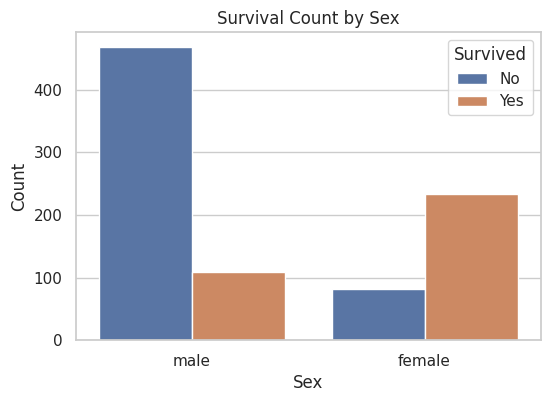

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=read_data, palette='deep')

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.show()

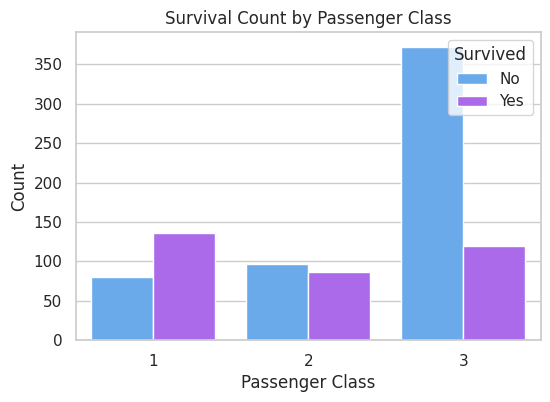

In [ ]:
# Bar plot for Pclass and Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=read_data, palette='cool')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


<ipython-input-15-7f4d3fcd5458>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=read_data, palette='pastel')


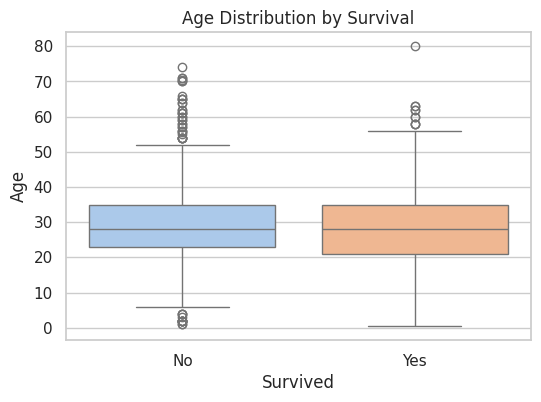

In [ ]:
# Box plot for Age and Survival
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=read_data, palette='pastel')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


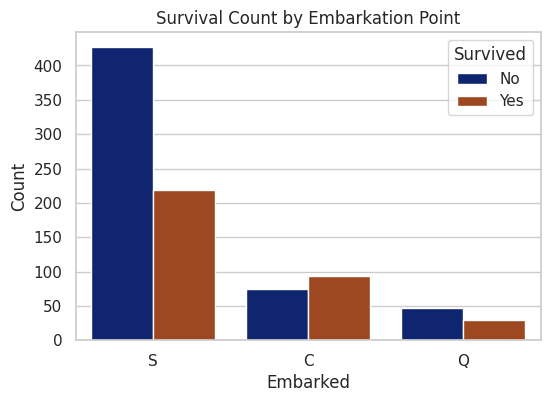

In [ ]:
# Bar plot for Embarked and Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=read_data, palette='dark')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


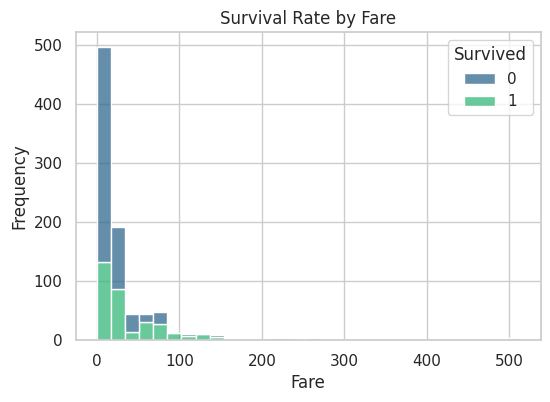

In [ ]:
# Plot the survival rate by fare
plt.figure(figsize=(6, 4))
sns.histplot(data=read_data, x='Fare', hue='Survived', multiple='stack', bins=30, palette='viridis')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from tabulate import tabulate

read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print("Columns in the dataset:", read_data.columns)

if 'SibSp' in read_data.columns and 'Parch' in read_data.columns:
    read_data['Sex'] = read_data['Sex'].map({'male': 0, 'female': 1})

    read_data['Embarked'] = read_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    read_data['FamilySize'] = read_data['SibSp'] + read_data['Parch'] + 1
    read_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

    print(tabulate(read_data.head(), headers='keys', tablefmt='psql'))
else:
    print("Required columns are not present in the dataset.")


Columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
+----+---------------+------------+----------+-------+-------+---------+---------+------------+--------------+
|    |   PassengerId |   Survived |   Pclass |   Sex |   Age |    Fare | Cabin   |   Embarked |   FamilySize |
|----+---------------+------------+----------+-------+-------+---------+---------+------------+--------------|
|  0 |             1 |          0 |        3 |     0 |    22 |  7.25   | nan     |          0 |            2 |
|  1 |             2 |          1 |        1 |     1 |    38 | 71.2833 | C85     |          1 |            2 |
|  2 |             3 |          1 |        3 |     1 |    26 |  7.925  | nan     |          0 |            1 |
|  3 |             4 |          1 |        1 |     1 |    35 | 53.1    | C123    |          0 |            2 |
|  4 |             5 |          0 |        3 |

# FEATURE ENGINEERING

+----+---------------+------------+----------+-------+-------+---------+------------+--------------+
|    |   PassengerId |   Survived |   Pclass |   Sex |   Age |    Fare |   Embarked |   FamilySize |
|----+---------------+------------+----------+-------+-------+---------+------------+--------------|
|  0 |             1 |          0 |        3 |     0 |    22 |  7.25   |          0 |            2 |
|  1 |             2 |          1 |        1 |     1 |    38 | 71.2833 |          1 |            2 |
|  2 |             3 |          1 |        3 |     1 |    26 |  7.925  |          0 |            1 |
|  3 |             4 |          1 |        1 |     1 |    35 | 53.1    |          0 |            2 |
|  4 |             5 |          0 |        3 |     0 |    35 |  8.05   |          0 |            1 |
+----+---------------+------------+----------+-------+-------+---------+------------+--------------+


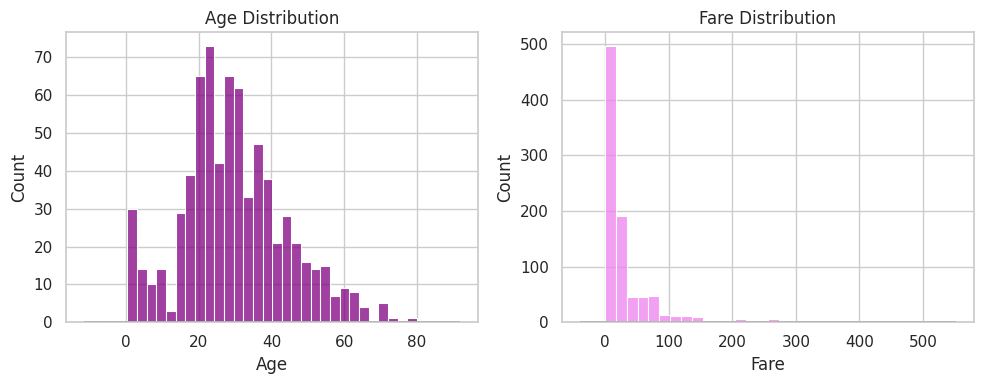

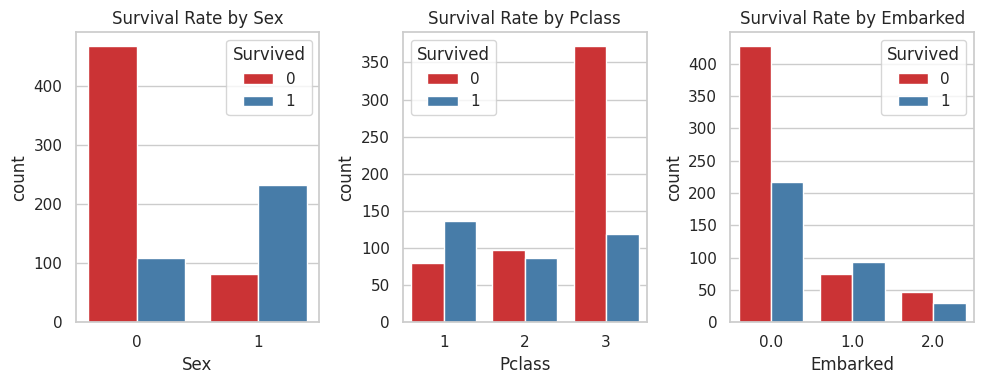

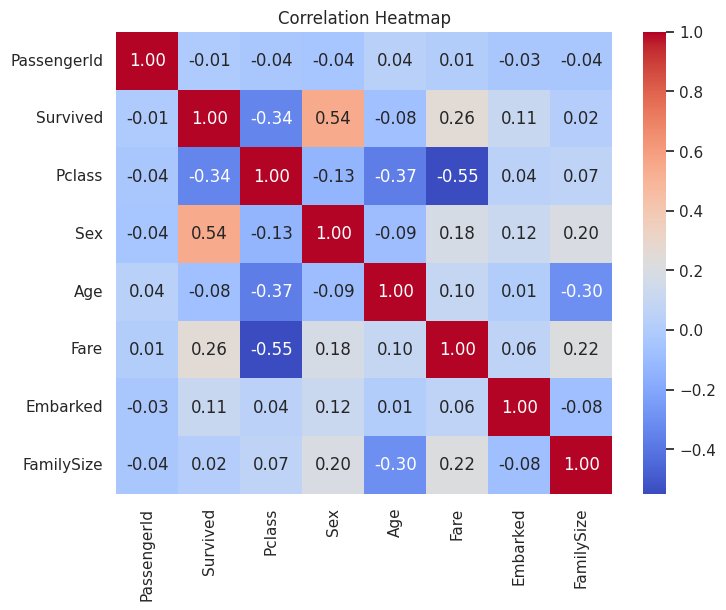

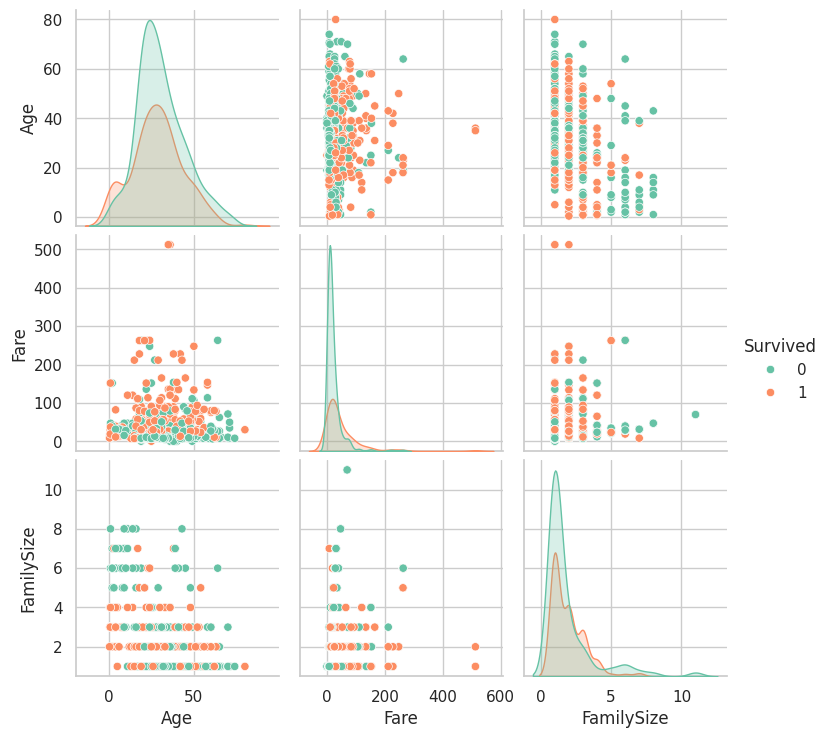

In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

read_data['Sex'] = read_data['Sex'].map({'male': 0, 'female': 1})
read_data['Embarked'] = read_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
read_data['FamilySize'] = read_data['SibSp'] + read_data['Parch'] + 1

read_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], inplace=True)

from tabulate import tabulate
print(tabulate(read_data.head(), headers='keys', tablefmt='psql'))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(read_data['Age'].dropna(), kde=False, bins=30, color='purple')
sns.kdeplot(read_data['Age'].dropna(), color='black')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(read_data['Fare'], kde=False, bins=30, color='violet')
sns.kdeplot(read_data['Fare'], color='black')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=read_data, palette='Set1')
plt.title('Survival Rate by Sex')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=read_data, palette='Set1')
plt.title('Survival Rate by Pclass')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=read_data, palette='Set1')
plt.title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

numeric_data = read_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(read_data[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived', palette='Set2')
plt.show()


# MODEL TESTING AND EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split

X = read_data.drop(columns=['Survived', 'PassengerId'])
y = read_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (712, 6)
Testing set shape: (179, 6)



Classification Reports:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.78      0.91      0.84        23

    accuracy                           0.78        37
   macro avg       0.79      0.74      0.75        37
weighted avg       0.79      0.78      0.77        37


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.80      0.87      0.83        23

    accuracy                           0.78        37
   macro avg       0.78 

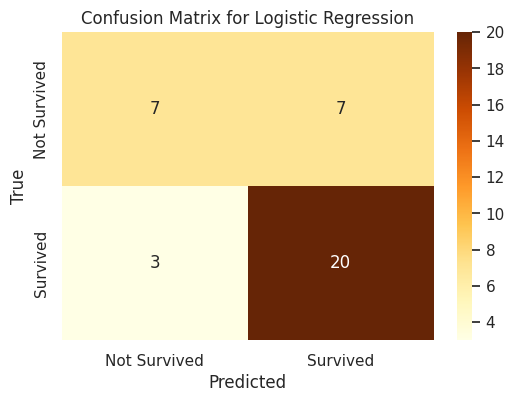

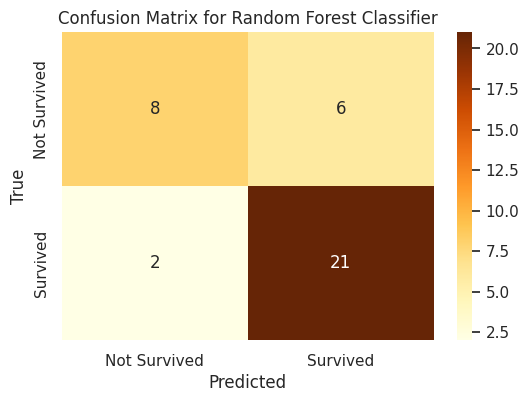

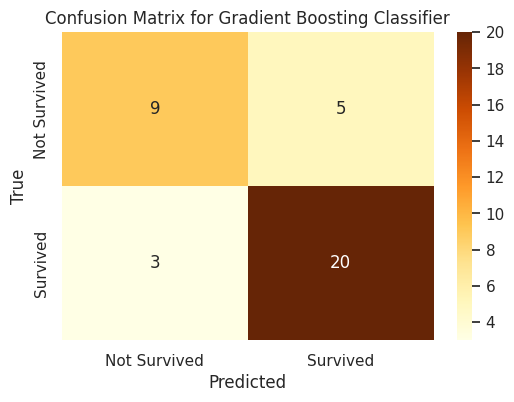

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

read_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
read_data.columns = ['PassengerId','Survived', 'Pclass', 'Name','Sex','Age','SibSp','Parch', 'Ticket', 'Fare','Cabin','Embarked']
read_data.dropna(inplace=True)

label_encoder = LabelEncoder()
read_data['Sex'] = label_encoder.fit_transform(read_data['Sex'])

read_data['Embarked'] = label_encoder.fit_transform(read_data['Embarked'])
read_data['Cabin_encoded'] = label_encoder.fit_transform(read_data['Cabin'])
read_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

X = read_data.drop(columns=['Survived'])
y = read_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
rf_clf_preds = rf_clf.predict(X_test)
gb_clf_preds = gb_clf.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
gb_clf_accuracy = accuracy_score(y_test, gb_clf_preds)

metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_accuracy, rf_clf_accuracy, gb_clf_accuracy]
})

print("\nClassification Reports:")
print("Logistic Regression:")
print(classification_report(y_test, log_reg_preds))
print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_clf_preds))
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_clf_preds))

print("\nMetrics Summary:")
print(metrics_df)

def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix('Logistic Regression', y_test, log_reg_preds)
plot_confusion_matrix('Random Forest Classifier', y_test, rf_clf_preds)
plot_confusion_matrix('Gradient Boosting Classifier', y_test, gb_clf_preds)


In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_clf_param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
gb_clf_param_grid = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 5, 7]}

log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_param_grid, cv=5)
rf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_clf_param_grid, cv=5)
gb_clf_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_clf_param_grid, cv=5)

log_reg_grid.fit(X_train, y_train)
rf_clf_grid.fit(X_train, y_train)
gb_clf_grid.fit(X_train, y_train)

log_reg_best_params = log_reg_grid.best_params_
log_reg_best_score = log_reg_grid.best_score_

rf_clf_best_params = rf_clf_grid.best_params_
rf_clf_best_score = rf_clf_grid.best_score_

gb_clf_best_params = gb_clf_grid.best_params_
gb_clf_best_score = gb_clf_grid.best_score_

print("Best Hyperparameters for Logistic Regression:", log_reg_best_params)
print("Best Score for Logistic Regression:", log_reg_best_score)

print("Best Hyperparameters for Random Forest Classifier:", rf_clf_best_params)
print("Best Score for Random Forest Classifier:", rf_clf_best_score)

print("Best Hyperparameters for Gradient Boosting Classifier:", gb_clf_best_params)
print("Best Score for Gradient Boosting Classifier:", gb_clf_best_score)

Best Hyperparameters for Logistic Regression: {'C': 0.1}
Best Score for Logistic Regression: 0.7266666666666666
Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Best Score for Random Forest Classifier: 0.76
Best Hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
Best Score for Gradient Boosting Classifier: 0.76


# MODEL TESTING AND SELECTION OF BEST MODEL


Accuracy of Models:
                    Model  Accuracy
Tuned Logistic Regression  0.675676
      Tuned Random Forest  0.783784
  Tuned Gradient Boosting  0.756757

Classification Metrics of Models:
                           Precision    Recall  F1-Score
Tuned Logistic Regression   0.665191  0.675676  0.650161
Tuned Random Forest         0.786186  0.783784  0.774414
Tuned Gradient Boosting     0.760852  0.756757  0.758248


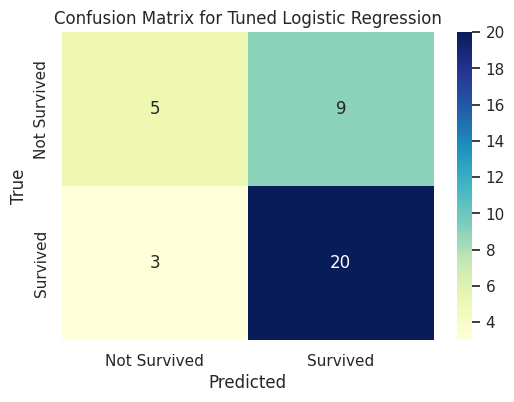

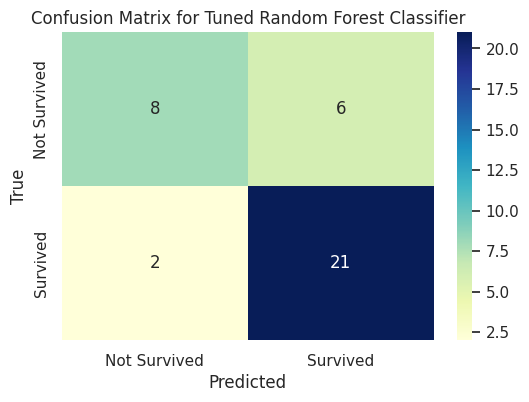

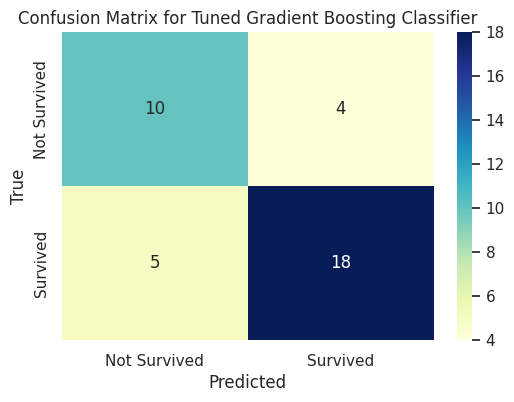

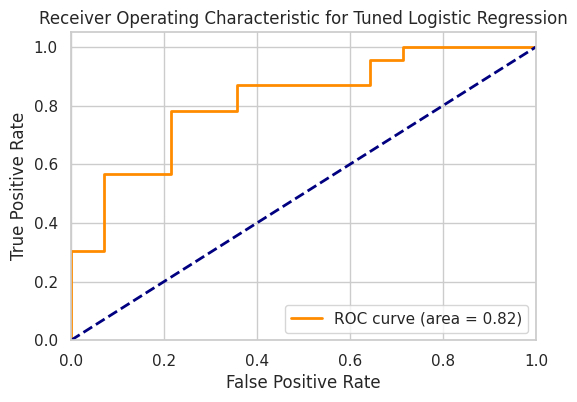

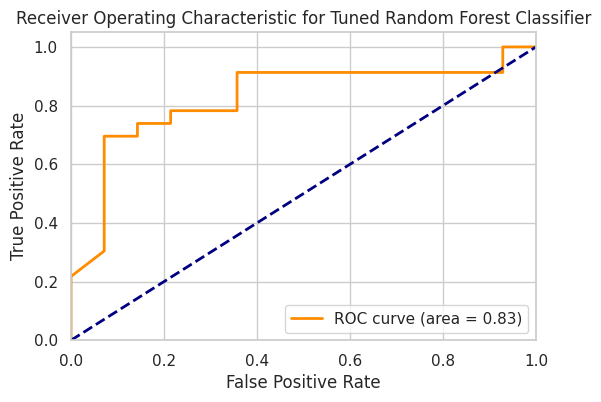

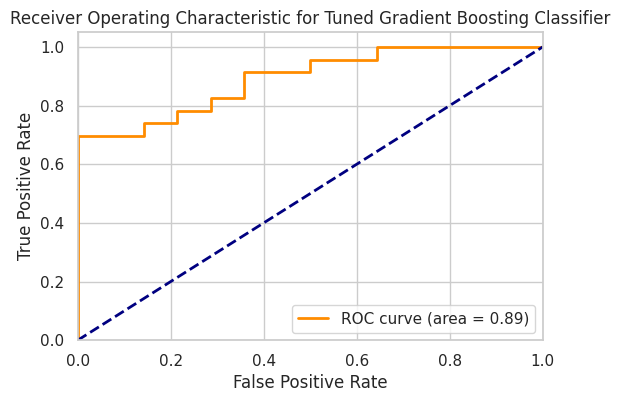

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')
data.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
data.dropna(inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Cabin_encoded'] = le.fit_transform(data['Cabin'])

data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3, max_depth=3, random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
rf_clf_preds = rf_clf.predict(X_test)
gb_clf_preds = gb_clf.predict(X_test)

# Accuracy
log_reg_acc = accuracy_score(y_test, log_reg_preds)
rf_clf_acc = accuracy_score(y_test, rf_clf_preds)
gb_clf_acc = accuracy_score(y_test, gb_clf_preds)

# Classification Reports
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
rf_clf_report = classification_report(y_test, rf_clf_preds, output_dict=True)
gb_clf_report = classification_report(y_test, gb_clf_preds, output_dict=True)

accuracy_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting'],
    'Accuracy': [log_reg_acc, rf_clf_acc, gb_clf_acc]
})

print("\nAccuracy of Models:")
print(accuracy_df.to_string(index=False))

def extract_metrics(report):
    return {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

log_reg_metrics = pd.DataFrame(extract_metrics(log_reg_report), index=['Tuned Logistic Regression'])
rf_clf_metrics = pd.DataFrame(extract_metrics(rf_clf_report), index=['Tuned Random Forest'])
gb_clf_metrics = pd.DataFrame(extract_metrics(gb_clf_report), index=['Tuned Gradient Boosting'])

metrics_df = pd.concat([log_reg_metrics, rf_clf_metrics, gb_clf_metrics])
print("\nClassification Metrics of Models:")
print(metrics_df)

def plot_conf_matrix(y_true, y_preds, model_name):
    cm = confusion_matrix(y_true, y_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def plot_roc(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_conf_matrix(y_test, log_reg_preds, 'Tuned Logistic Regression')
plot_conf_matrix(y_test, rf_clf_preds, 'Tuned Random Forest Classifier')
plot_conf_matrix(y_test, gb_clf_preds, 'Tuned Gradient Boosting Classifier')

# Logistic Regression
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
plot_roc(y_test, log_reg_probs, 'Tuned Logistic Regression')

# Random Forest Classifier
rf_clf_probs = rf_clf.predict_proba(X_test)[:, 1]
plot_roc(y_test, rf_clf_probs, 'Tuned Random Forest Classifier')

# Gradient Boosting Classifier
gb_clf_probs = gb_clf.predict_proba(X_test)[:, 1]
plot_roc(y_test, gb_clf_probs, 'Tuned Gradient Boosting Classifier')


**Compare accuracies**

In [ ]:
accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Random Forest': rf_clf_accuracy,
    'Gradient Boosting': gb_clf_accuracy
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The best prediction model is: {best_model} with an accuracy of {best_accuracy:.4f}")


The best prediction model is: Random Forest with an accuracy of 0.7838


# Data Visualization Script for Titanic Passenger Details

Enter the ticket number to enquire about: 113803
Passenger Details:
 PassengerId  Survived  Pclass                                         Name    Sex  Age  SibSp  Parch Ticket  Fare Cabin Embarked
           4         1       1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0 113803  53.1  C123        S
         138         0       1                  Futrelle, Mr. Jacques Heath   male 37.0      1      0 113803  53.1  C123        S


<ipython-input-27-da7e7ea58c0c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=passenger_data, palette=warm_palette)
<ipython-input-27-da7e7ea58c0c>:25: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.countplot(x='Pclass', data=passenger_data, palette=warm_palette)
<ipython-input-27-da7e7ea58c0c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=passenger_data, palette=warm_palette)
<ipython-input-27-da7e7ea58c0c>:32: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='Sex', data=passenger_data, palette=warm_palette)
<ipython-input-27-da7e7e

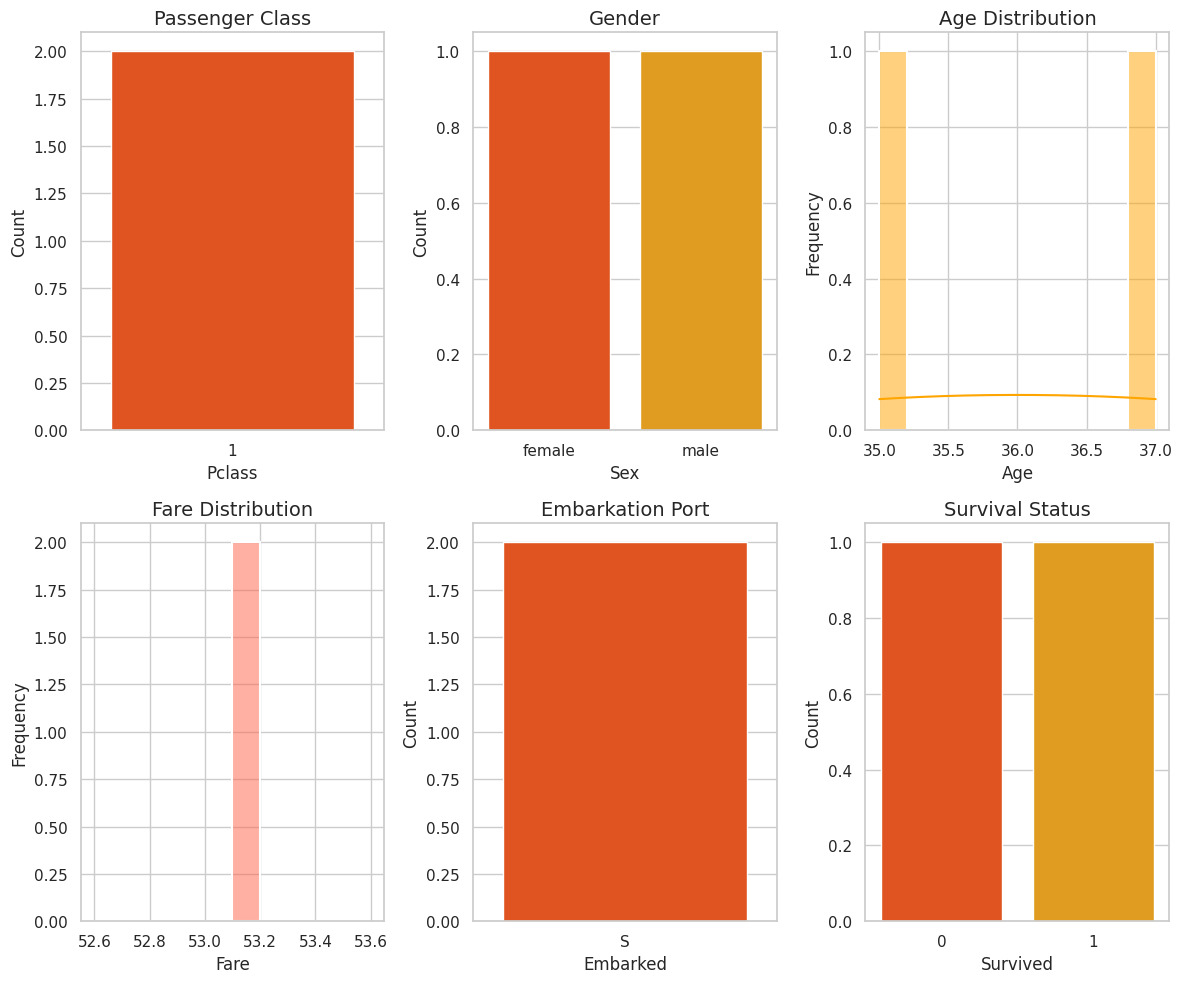

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

titanic_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', encoding='latin1', sep=',', engine='python')

titanic_data.dropna(inplace=True)

def visualize_passenger_details(ticket_number):
    passenger_data = titanic_data[titanic_data['Ticket'] == ticket_number]

    if passenger_data.empty:
        print(f"No passenger found with ticket number: {ticket_number}")
        return

    print("Passenger Details:")
    print(passenger_data.to_string(index=False))
    plt.figure(figsize=(12,10))

    # Warm color palette
    warm_palette = ['#FF4500', '#FFA500', '#FFD700', '#FF6347', '#FF8C00']

    # Plot Passenger Class
    plt.subplot(2, 3, 1)
    sns.countplot(x='Pclass', data=passenger_data, palette=warm_palette)
    plt.title('Passenger Class', fontsize=14)
    plt.xlabel('Pclass', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Plot Gender
    plt.subplot(2, 3, 2)
    sns.countplot(x='Sex', data=passenger_data, palette=warm_palette)
    plt.title('Gender', fontsize=14)
    plt.xlabel('Sex', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Plot Age
    plt.subplot(2, 3, 3)
    sns.histplot(passenger_data['Age'], bins=10, kde=True, color='#FFA500', linewidth=1.5)
    plt.title('Age Distribution', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot Fare
    plt.subplot(2, 3, 4)
    sns.histplot(passenger_data['Fare'], bins=10, kde=True, color='#FF6347', linewidth=1.5)
    plt.title('Fare Distribution', fontsize=14)
    plt.xlabel('Fare', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot Embarkation Port
    plt.subplot(2, 3, 5)
    sns.countplot(x='Embarked', data=passenger_data, palette=warm_palette)
    plt.title('Embarkation Port', fontsize=14)
    plt.xlabel('Embarked', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Plot Survival
    plt.subplot(2, 3, 6)
    sns.countplot(x='Survived', data=passenger_data, palette=warm_palette)
    plt.title('Survival Status', fontsize=14)
    plt.xlabel('Survived', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    plt.tight_layout()
    plt.show()

ticket_number = input("Enter the ticket number to enquire about: ")
visualize_passenger_details(ticket_number)
